# Clase 10: Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster as cl
import matplotlib.pyplot as plt

Leamos los benchamarks. Estas son fuentes de datos usadas para evaluar distintas metodologías de cluster

In [2]:
agg = pd.read_table('Aggregation.txt', header = None, names = ['x', 'y', 'c'])
s1 = pd.read_table('data_s1.txt', header = None, names = ['x', 'y', 'c'], sep = ',')
path = pd.read_table('pathbased.txt', header = None, names = ['x', 'y', 'c'])
spiral = pd.read_table('spiral.txt', header = None, names = ['x', 'y', 'c'])

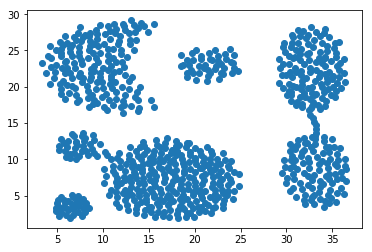

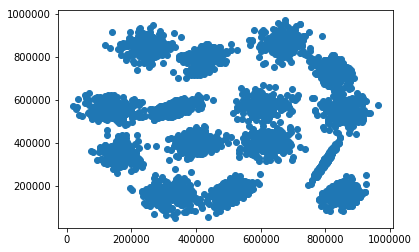

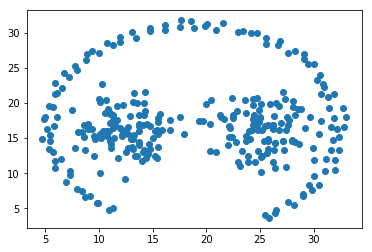

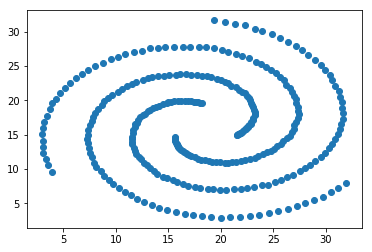

In [3]:
plt.scatter(agg['x'], agg['y'])
plt.show()
plt.scatter(s1['x'], s1['y'])
plt.show()
plt.scatter(path['x'], path['y'])
plt.show()
plt.scatter(spiral['x'], spiral['y'])
plt.show()

Estas bases vienen con la "respuesta"

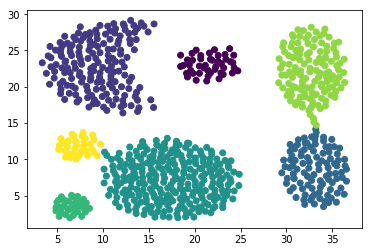

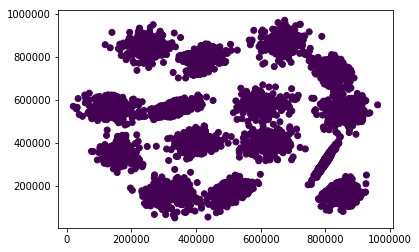

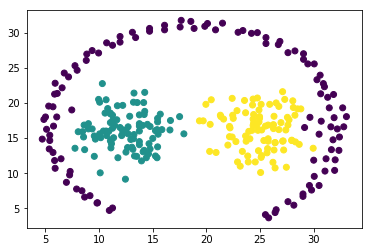

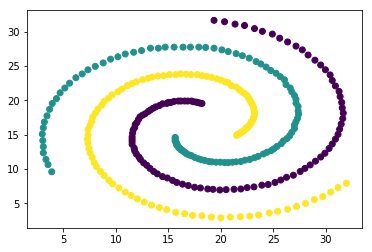

In [4]:
plt.scatter(agg['x'], agg['y'], c = agg['c'])
plt.show()
plt.scatter(s1['x'], s1['y'], c = s1['c'])
plt.show()
plt.scatter(path['x'], path['y'], c = path['c'])
plt.show()
plt.scatter(spiral['x'], spiral['y'], c = spiral['c']) 
plt.show()

Veamos como se comporta el K-Means en cada uno de estos

```KMeans(n_clusters=8, max_iter=300, tol=0.0001, verbose=0, copy_x=True, n_jobs=1)```
- **n_clusters**: Número de clusters
- **max_iter**: Máximo de iteraciones
- **tol**: Criterio de detención


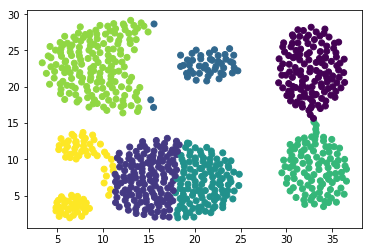

In [5]:
kme = cl.KMeans(n_clusters = 7)
ft1 = kme.fit_predict(agg[['x', 'y']]) 
plt.scatter(agg['x'], agg['y'], c = ft1)
plt.show()

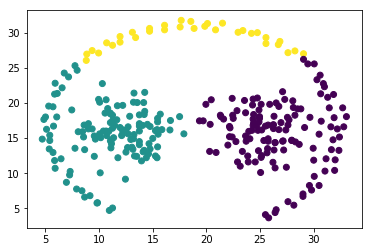

In [6]:
kme = cl.KMeans(n_clusters = 3)
ft2 = kme.fit_predict(path[['x', 'y']]) 
plt.scatter(path['x'], path['y'], c = ft2)
plt.show()

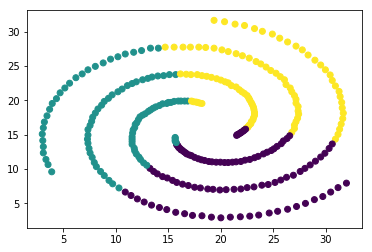

In [7]:
kme = cl.KMeans(n_clusters = 3)
ft3 = kme.fit_predict(spiral[['x', 'y']]) 
plt.scatter(spiral['x'], spiral['y'], c = ft3)
plt.show()

Comentarios?

Hagamos un proyecto muy sencillo de segmentación. La data de a continuación corresponde a 9000 clientes activos de de tarjetas de crédito y las variables con el comportamiento que ha tenido en los últimos 6 meses. Analizaremos las siguientes

- **CUSTID** : ID del cliente
- **BALANCE** : Saldo disponible para compras 
- **PURCHASES** : Cantidad de compras hechas
- **ONEOFFPURCHASES** : Compra máxima hecha sin cuotas
- **INSTALLMENTSPURCHASES** : Cantidad de compras hechas en cuotas
- **CASHADVANCE** : Dinero tomado en avances
- **CASHADVANCEFREQUENCY** : Frecuencia de avances
- **CASHADVANCETRX** : Número de transacciones con pie
- **PURCHASESTRX** : Número de transacciones
- **CREDITLIMIT** : Cupo
- **PAYMENTS** : Cantidad de pagos hechos
- **MINIMUM_PAYMENTS** : Pago mínimo hecho por el cliente
- **PRCFULLPAYMENT** : Porcentaje de pago total hecho por el usuario

In [54]:
cc = pd.read_csv('CC GENERAL.csv')[['CUST_ID',
                                    'BALANCE',
                                    'PURCHASES',
                                    'ONEOFF_PURCHASES',
                                    'INSTALLMENTS_PURCHASES',
                                    'CASH_ADVANCE',
                                    'CASH_ADVANCE_FREQUENCY', 
                                    'CASH_ADVANCE_TRX',
                                    'PURCHASES_TRX',
                                    'CREDIT_LIMIT',
                                    'PAYMENTS',
                                    'MINIMUM_PAYMENTS',
                                    'PRC_FULL_PAYMENT']]

In [56]:
cc.head()

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,C10001,40.900749,95.40,0.00,95.4,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,C10002,3202.467416,0.00,0.00,0.0,6442.945483,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,C10003,2495.148862,773.17,773.17,0.0,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,C10004,1666.670542,1499.00,1499.00,0.0,205.788017,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,C10005,817.714335,16.00,16.00,0.0,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


Super importante!!! como el k-means se basa en distancias, la data debe estar escalada y sin anomalías. Los escalamientos más típicos son

**Minmax Scaler**

$$s = \dfrac{x - \hbox{min}(x)}{\hbox{max}(x) - \hbox{min}(x)}$$

**Standar Scaler**

$$s = \dfrac{x - \bar{x}}{\sigma}$$

**Tukey Scaler**

$$s = \dfrac{x - \hbox{md(x)}}{\hbox{iqr}(x)}$$

Como regla de dedo, el minmax es útil si la data es homogénea, el de tukey si se corre el riesgo de anomalías y el standar en cualquier otro caso. Si se usa el standar recordar remover anomalías, pues caso contrario se sobreestima la varianza y se sesga la media

In [57]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Imputación de datos por la media

In [58]:
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(cc[cc.columns[1:]])
X = imputer.transform(cc[cc.columns[1:]])

Escalamiento de datos

In [59]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Un problema del k-means es la elección del número de clusters. Una forma es probar con varios y ver la ganancia marginal del número de clusters. El criterio a tomar es la suma de cuadrados dentro dividido por la suma de cuadrados totales, sería como un "$R^2$" de los cluster.

$$W_C = \sum_{k=1}^{K} \sum_{i = i}^N I(C(i) = k)  \sum_{i = 1}^{N_k}(||x_i - \bar{x}_k||^2)$$

Por otra parte esto se comparta con la suma de cuadrados totales.

$$W_0 = \sum_{i = i}^N (||x_i - \bar{x}||^2)$$

Luego el porcentaje de suma de cuadrados dentro de los clusters es:

$$\hbox{lift} = \dfrac{W_C}{W_0}$$


Aplicando un poco lo aprendido de dataframes no es tan complicado.

In [60]:
def get_SCW(k):
    kme = cl.KMeans(n_clusters = k)
    kme.fit(X) 
    return kme.inertia_

In [61]:
W = []
for i in range(1, 20):
    W.append(get_SCW(i))

In [62]:
lifts = (W)/W[0]

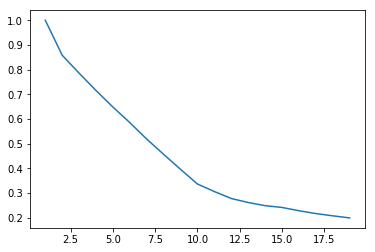

In [63]:
plt.plot(range(1,20), lifts)
plt.show()

Cuando la sedimentación no es tan marcada, es indicio de que los datos no necesariamente están agrupados. En este caso, recién se comienza a estancar en el 15, probablemente se requiera reducir dimension antes. En este ejemplo haremos con 3 a modo de ilustración.

In [64]:
kme = cl.KMeans(n_clusters = 3)
kme.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
Clustered = cc
Clustered['Cluster'] = kme.predict(X)

Calculamos la media cada cluster, y acto seguido la idea es interpretar dichos resultados.

In [73]:
medias = Clustered.groupby(['Cluster']).median()
medias

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
Cluster,,,,,,,,,,,,
0,2294.504351,5086.155,3094.085,1690.09,0.000000,0.000000,0.0,70.0,8500.0,4.555052e+03,653.194444,0.000000
1,1389.046355,8561.735,5432.755,3128.98,2143.743189,0.166666,7.5,97.0,8000.0,1.065446e+07,561.216944,0.472222
2,819.761221,312.490,0.000,60.91,0.000000,0.000000,0.0,6.0,3000.0,7.756392e+02,298.933725,0.000000


Esta vista puede ser facilitada usando un gráfico de red o gráfico de araña. No existe una función directa (o probablemente no la conozco), pero usando un poco de ingenio y coordenadas polares podemos hace un truco.

In [74]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [75]:
labels = medias.columns
cl1 = medias.loc[medias.index == 0].values
cl2 = medias.loc[medias.index == 1].values
cl3 = medias.loc[medias.index == 2].values

In [76]:
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint = False)
cl1 = cl1.ravel()
cl2 = cl2.ravel()
cl3 = cl3.ravel()

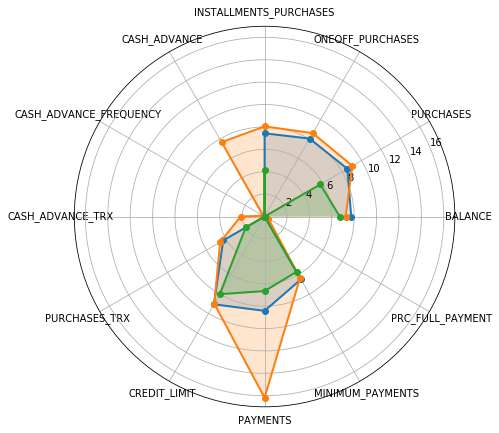

In [78]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar = True)
ax.plot(angles, np.log(cl1 + 1), 'o-', linewidth = 2)
ax.fill(angles, np.log(cl1 + 1), alpha = 0.2)
ax.plot(angles, np.log(cl2 + 1), 'o-', linewidth = 2)
ax.fill(angles, np.log(cl2 + 1), alpha = 0.2)
ax.plot(angles, np.log(cl3 + 1), 'o-', linewidth = 2)
ax.fill(angles, np.log(cl3 + 1), alpha = 0.2)
ax.set_thetagrids(angles * 180 / np.pi, labels)  # Set the label for each axis
ax.grid(True)

#### Aplicación: Reducción de tamaño de una imagen

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


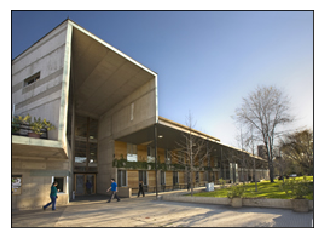

In [24]:
from scipy import misc
mat = misc.imread('frontis_mat_puc.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(mat)
plt.show()

Aqui tiene más sentido escalar por el mínimo y máximo para conservar las escalas de colores.

In [25]:
data = mat / 255.0
data = data.reshape(180 * 250, 3)
data.shape

(45000, 3)

In [ ]:
data

Veamos la composición de colores

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


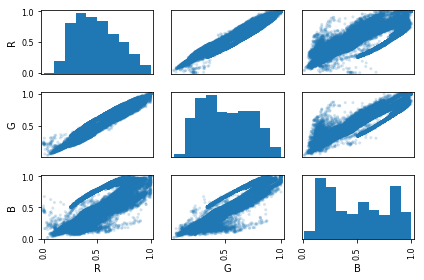

In [26]:
df = pd.DataFrame(data, columns=['R','G','B'])
axes = pd.tools.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()
plt.show()

In [40]:
kmeans = cl.MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

C:\Users\simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


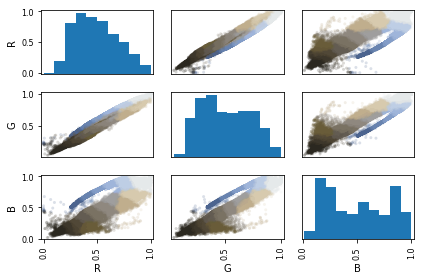

In [41]:
df = pd.DataFrame(data, columns=['R','G','B'])
axes = pd.tools.plotting.scatter_matrix(df, alpha=0.2, c = new_colors)
plt.tight_layout()
plt.show()

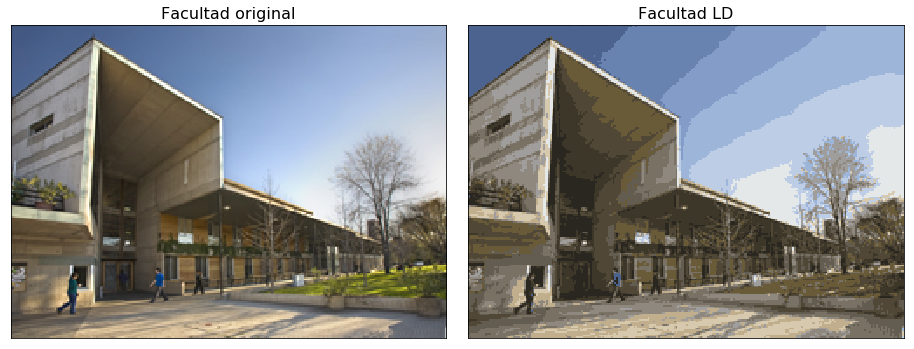

In [42]:
mat_recolored = new_colors.reshape(mat.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(mat)
ax[0].set_title('Facultad original', size=16)
ax[1].imshow(mat_recolored)
ax[1].set_title('Facultad LD', size=16)
plt.show()

### DBSCAN

El K-means es una metodología bastante práctica pero tiene algunas falencias, muchas de ellas derivadas del hecho que está basada en una métrica de distancia a centroides.

Una metodología que se ha vuelto popular ultimamente es el DBSCAN (Density-Based Spatial Clustering of Applications with Noise) el cual se basa en la densidad de puntos para elegir clusters.

```DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’, n_jobs=1)```

- eps: es el épsilon de la vecindad a tomar.
- min_samples: Cantidad mínima de datos en una vecindad para formar cluster
- metric: La distancia a usar.
- n_jobs: Cantidad de hilos de ejecución.

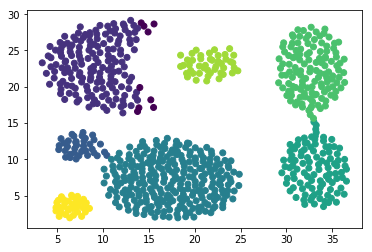

In [30]:
kme = cl.DBSCAN(eps = 2.5, min_samples = 25)
ft1 = kme.fit_predict(agg[['x', 'y']]) 
plt.scatter(agg['x'], agg['y'], c = ft1)
plt.show()

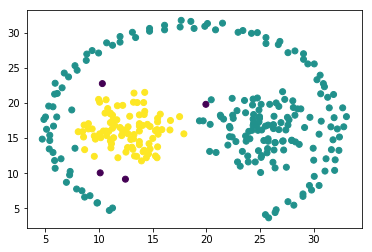

In [35]:
kme = cl.DBSCAN(eps = 2, min_samples = 5)
ft1 = kme.fit_predict(path[['x', 'y']]) 
plt.scatter(path['x'], path['y'], c = ft1)
plt.show()

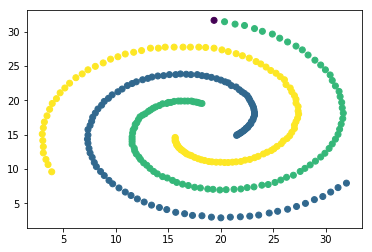

In [36]:
kme = cl.DBSCAN(eps = 2, min_samples = 5)
ft1 = kme.fit_predict(spiral[['x', 'y']]) 
plt.scatter(spiral['x'], spiral['y'], c = ft1)
plt.show()

Elección de parámetros

In [37]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(path[['x', 'y']])
distances, indices = nbrs.kneighbors(path[['x', 'y']])

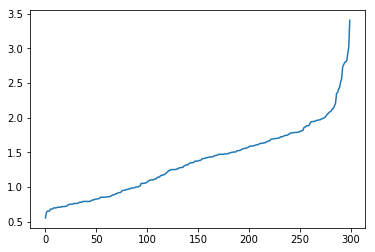

In [38]:
plt.plot(np.sort(distances[:, 4]))
plt.show()

In [39]:
cl.DBSCAN(eps = 2, min_samples = 5)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

#### Aplicación: Detección de anomalías.
